
<center> <img src="https://www.ufrn.br/resources/documentos/identidadevisual/brasao/brasao_flat.png" width="100" height="100"> </center>

## <center> IMPLEMENTAÇÃO DOS CÓDIGOS ESTUDADOS </center>




O presente arquivo tem por objetivo resumir os métodos e algoritmos estudados durante a disciplina de Tópicos Especiais em Inteligência Artificial ofertada pela UFRN.

---
- Universidade Federal do Rio Grande do Norte
- Docente responsável: José Alfredo Ferreira Costa
- Discente: Douglas Wilian Lima Silva
---

Este resumo foi pensado com base na definição dos contéudos, utilizando o método de seleção através da matrícula. Dessa forma, com a matrícula **20210022410**, serão abordados os algoritmos marcados abaixo.

- [$\hspace{0.4cm}$] Methods for machine learning
- [ ***x*** ] Data load for ML projects
- [$\hspace{0.4cm}$] Understanding data with statistics
- [ ***x*** ] Understanting data with visualization
- [$\hspace{0.4cm}$] Preparing data
- [ ***x*** ] Data feature selection
- [$\hspace{0.4cm}$] Introduction
- [ ***x*** ] Logistic regression
- [$\hspace{0.4cm}$] Support Vector Machine - SVM
- [ ***x*** ] Decision Tree
- [$\hspace{0.4cm}$] Naive Bayes
- [ ***x*** ] Random Forest
- [$\hspace{0.4cm}$] Regression algorithms - Overview
- [ ***x*** ] Linear regression
- [$\hspace{0.4cm}$] Clustering algorithms - Overview
- [ ***x*** ] Clustering algorithms - K-means
- [$\hspace{0.4cm}$] Clustering algorithms - Mean Shift Algorithm
- [ ***x*** ] Clustering algorithms - Hierarchical Clustering
- [$\hspace{0.4cm}$] KNN - K-Nearest Neighbors
- [ ***x*** ] Performance Metrics
- [$\hspace{0.4cm}$] Automatic Workflows
- [ ***x*** ] Improving performance of ML Models

---



### DATA LOAD FOR ML PROJECTS

#### - Base de dados WINE

In [ ]:
#Importação usando pandas

from pandas import read_csv

diretorio = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

dados = read_csv(diretorio)
dados.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [ ]:
#Podemos adicionar os headers

headers = [
    'Class',
    'Alcohol',
    'Malic_acid',
    'Ash',
    'Alcalinity_of_ash',
    'Magnesium',
    'Total_phenols',
    'Flavanoids',
    'Nonflavanoid_phenols',
    'Proanthocyanins',
    'Color_intensity',
    'Hue',
    'OD280_OD315_of_diluted_wines',
    'Proline'
]

ndados = read_csv(diretorio, names = headers)

display(ndados.head())
print(ndados.shape)

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


(178, 14)


###UNDERSTANDING DATA WITH VISUALIZATION

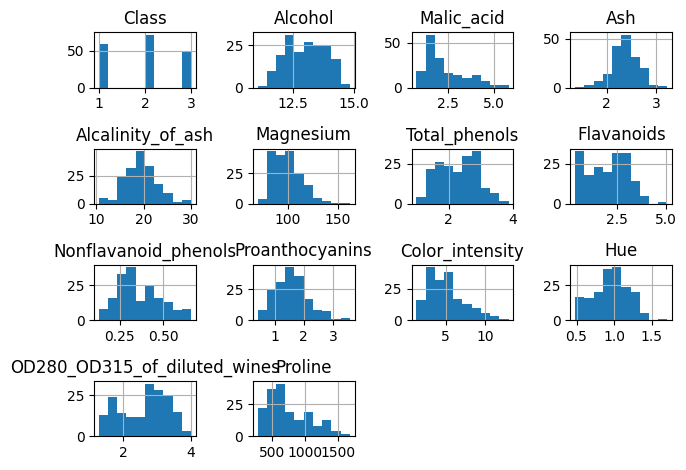

In [ ]:
# Visualização com histograma
import matplotlib.pyplot as plt

ndados.hist()
plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

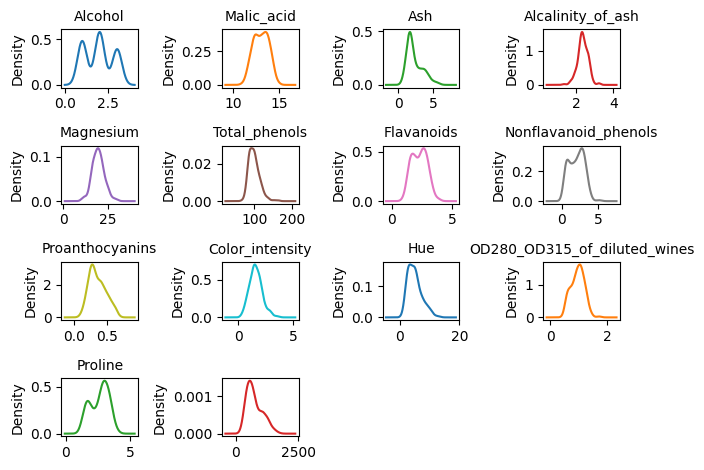

In [ ]:
#Density plot
plt.figure(figsize=(20, 20))
ndados.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, legend=False)

#laço para ajustar os subplots, estavam ficando todos juntos
for i, col in enumerate(ndados.columns[1:]):
    plt.subplot(4, 4, i + 1)
    plt.title(col, fontsize=10)

plt.tight_layout()
plt.show()

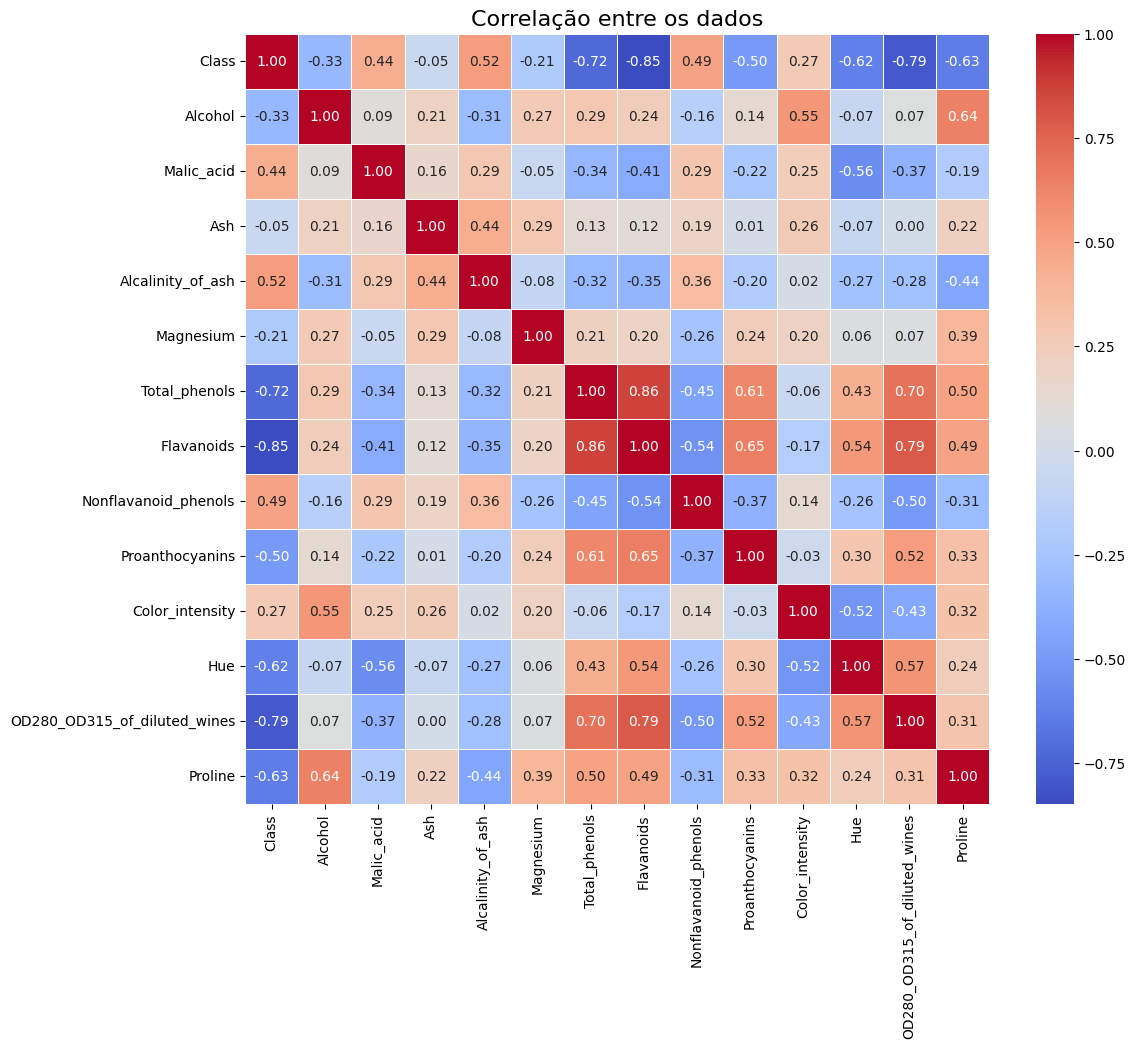

In [ ]:
#Correlação entre os dados

import seaborn as sns

correlation_matrix = ndados.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlação entre os dados', fontsize=16)

plt.show()

###DATA FEATURE SELECTION

###LOGISTIC REGRESSION

Neste método, os valores de alvo "target" pode assumir apenas dois valores 0 ou 1. Dessa forma, durante o processo é necessário fazer a conversão das classes para tais valores.

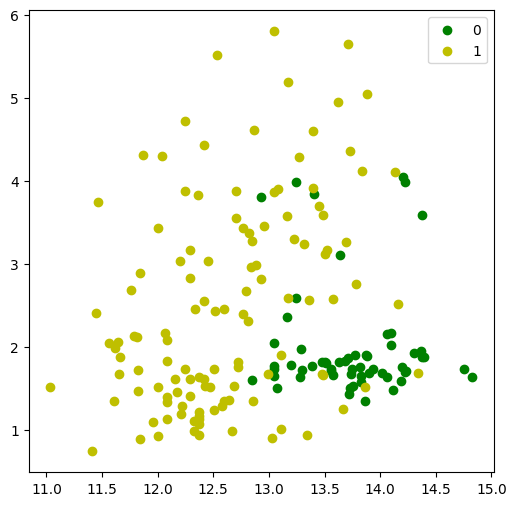

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

wine = load_wine()

X = pd.DataFrame(data=wine.data)
X['target'] = wine.target
x1 = X.to_numpy()
y = (wine.target!=0)*1 #Convertendo os valores das classes para binários

plt.figure(figsize=(6, 6))
plt.scatter(x1[y == 0][:, 0], x1[y == 0][:, 1], color='g', label='0')
plt.scatter(x1[y == 1][:, 0], x1[y == 1][:, 1], color='y', label='1')
plt.legend();


In [ ]:
#Separação dos dados

indices=np.random.permutation(X.shape[0])
div = int(0.4*len(indices))
train_id, test_id = indices[:div],indices[div:]
ctrain, ctest = X.loc[train_id,:], X.loc[test_id,:]

xtrain = ctrain.drop('target', axis =1)
ytrain = (ctrain.target!=0)*1
xtest = ctest.drop('target', axis =1)
ytest = (ctest.target!=0)*1


regre = LogisticRegression(solver = 'liblinear')

regre.fit(xtrain, ytrain)

ypred = regre.predict(xtest)

mt = metrics.confusion_matrix(ytest, ypred)

print("Acurácia do modelo foi:",
metrics.accuracy_score(ytest, ypred)*100)


Acurácia do modelo foi: 93.45794392523365


Text(0.5, 1.0, 'Matriz de Confusão')

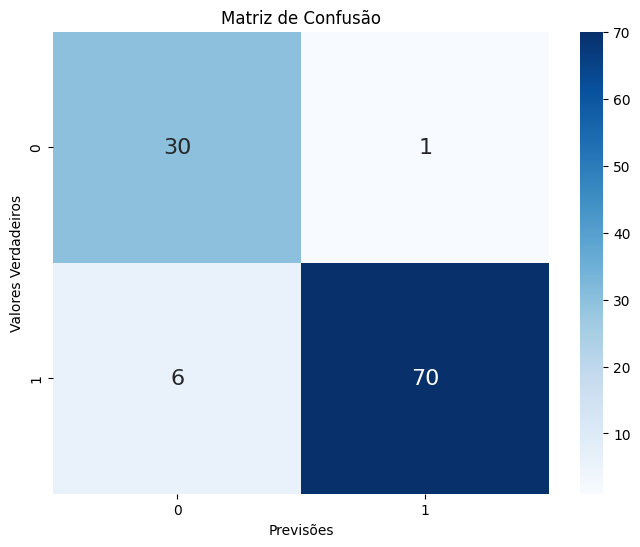

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(mt, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')

### DECISION TREE

In [ ]:
#importacao da base de dados + bibliotecas

from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

data = load_wine()

df = pd.DataFrame(data = data.data, columns = data['feature_names'])
df['target'] = data.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
#Normalização dos dados

m = MinMaxScaler()
normalized = pd.DataFrame(m.fit_transform(df), columns = df.columns)
normalized['target'] = df.target

normalized.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0


In [ ]:
#Separação dos dados

i=np.random.permutation(normalized.shape[0])
d = int(0.4*len(i))
train, test = i[:d],i[d:]
TR, TS = normalized.loc[train,:], normalized.loc[test,:]

xtrain1 = TR.drop('target', axis =1)
ytrain1 = TR.target
xtest1 = TS.drop('target', axis =1)
ytest1 = TS.target


In [ ]:
#Classificador

classifier = DecisionTreeClassifier()

classifier = classifier.fit(xtrain1, ytrain1)

ypred1 = classifier.predict(xtest1)

acc = accuracy_score(ytest1, ypred1)

print(f"A acurácia do modelo foi de {acc*100:.4f} %")

A acurácia do modelo foi de 84.1121 %


Text(0.5, 1.0, 'Matriz de Confusão')

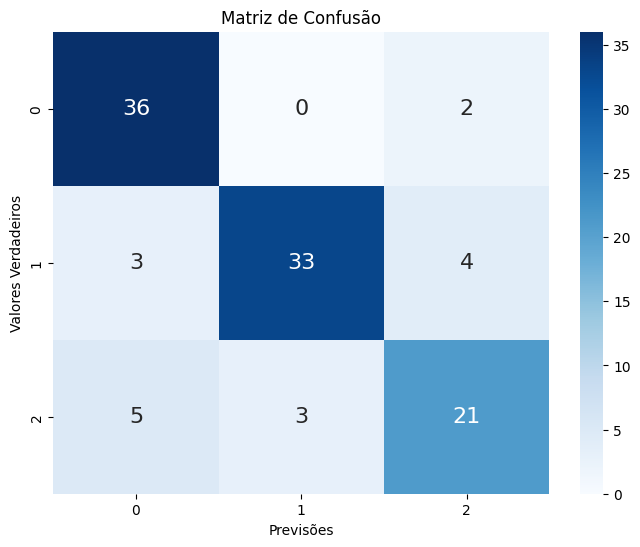

In [ ]:
#Matriz de confusão

cm = confusion_matrix(ytest1, ypred1)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')

In [ ]:
#estatísticas

result1 = classification_report(ytest1, ypred1)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        38
           1       0.92      0.82      0.87        40
           2       0.78      0.72      0.75        29

    accuracy                           0.84       107
   macro avg       0.84      0.83      0.83       107
weighted avg       0.84      0.84      0.84       107



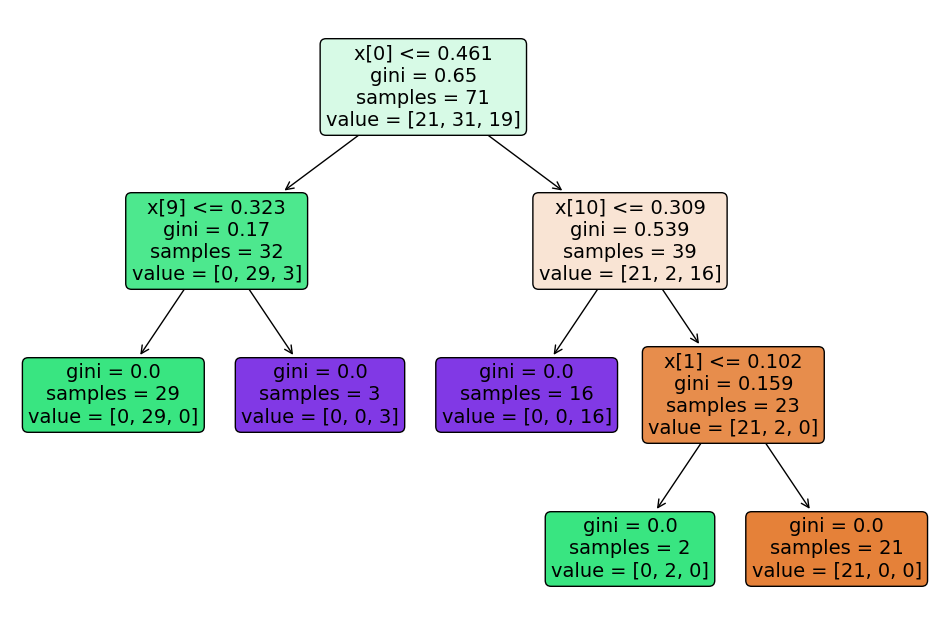

In [ ]:
# Visualização da arvore
plt.figure(figsize=(12, 8))
plot_tree(classifier, filled=True, feature_names=None, class_names=None, rounded=True)
plt.show()

###RANDOM FOREST CLASSIFIER

Consiste na realização de um conjunto de árvores de decisão nos dados selecionados, para então realizar uma votação da melhor solução obtida entre elas, apresentando assim a predição.

PRÓS:

- Supera problemas de overfitting (Especificação para o conjunto de dados), já que utiliza a média do resultado de diversas árvores.

- Funciona bem com variabilidade dos dados.

- Não requer necessariamente um escalonamento dos dados.


CONTRAS:

- Maior complexidade.

- Maior uso de recursos computacionais.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

load = load_wine()

n = MinMaxScaler()

data = pd.DataFrame(n.fit_transform(load.data))

data.columns, data['target'] = load['feature_names'], load.target

data.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0


In [27]:
#Separação das classes

i=np.random.permutation(data.shape[0])
d = int(0.4*len(i))
train, test = i[:d],i[d:]
TR, TS = data.loc[train,:], data.loc[test,:]

xtrain2 = TR.drop('target', axis =1)
ytrain2 = TR.target
xtest2 = TS.drop('target', axis =1)
ytest2 = TS.target


cl = RandomForestClassifier()
cl.fit(xtrain2, ytrain2)

pred = cl.predict(xtest2)

acuracia = accuracy_score(ytest2, pred)

cfm = confusion_matrix(ytest2, pred)

result = classification_report(ytest2, pred)

print(f'A acurácia do modelo foi {acuracia*100:.4f} %\n')

print('Classification Report\n')
print(result)

A acurácia do modelo foi 94.3925 %

Classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.85      0.92        40
           2       0.87      1.00      0.93        34

    accuracy                           0.94       107
   macro avg       0.95      0.95      0.95       107
weighted avg       0.95      0.94      0.94       107



Text(0.5, 1.0, 'Matriz de Confusão')

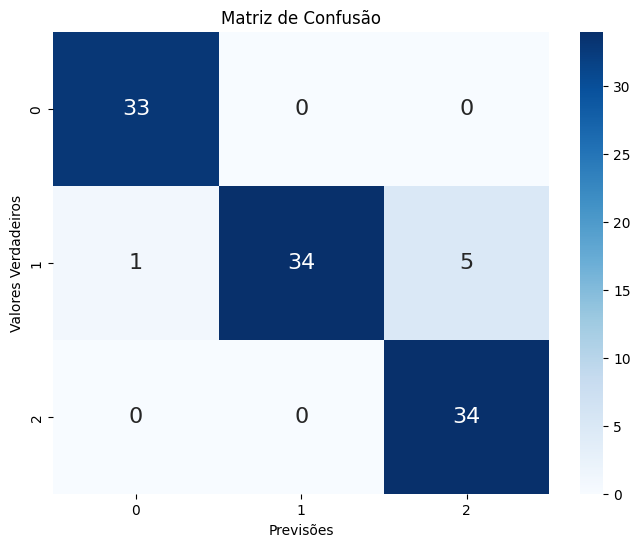

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(cfm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')

###COMPARAÇÃO DAS ACURÁCIAS ENTRE OS MODELOS SEM ESCALONAMENTO DOS DADOS.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

load = load_wine()

data1 = pd.DataFrame(data = load.data)

data1.columns, data1['target'] = load['feature_names'], load.target

data1.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [37]:
#Separação das classes

i=np.random.permutation(data1.shape[0])
d = int(0.4*len(i))
train, test = i[:d],i[d:]
TR, TS = data1.loc[train,:], data1.loc[test,:]

xtrain3 = TR.drop('target', axis =1)
ytrain3 = TR.target
xtest3 = TS.drop('target', axis =1)
ytest3 = TS.target

#RANDOM FOREST
cl = RandomForestClassifier()
cl.fit(xtrain3, ytrain3)

pred = cl.predict(xtest3)

acuracia = accuracy_score(ytest3, pred)


#INDIVIDUAL TREE

clf = DecisionTreeClassifier()
clf.fit(xtrain3, ytrain3)

pred1 = clf.predict(xtest3)

acuracia1 = accuracy_score(ytest3, pred1)


print('\t\tRESULTADOS\n')


print('RANDOM FOREST:\n')
print(f'A acurácia do modelo foi {acuracia*100:.4f} %\n')

print('INDIVIDUAL TREE:\n')
print(f'A acurácia do modelo foi {acuracia1*100:.4f} %\n')


		RESULTADOS

RANDOM FOREST:

A acurácia do modelo foi 98.1308 %

INDIVIDUAL TREE:

A acurácia do modelo foi 90.6542 %



###LINEAR REGRESSION